In [146]:
from skimage.metrics import structural_similarity
import imutils # for contours 
import cv2  # for comp vision
from PIL import Image  # for image based processing
import requests # to read images from urls


In [147]:
!mkdir pan_tampered 
!mkdir pan_tampered/image

mkdir: cannot create directory ‘pan_tampered’: File exists
mkdir: cannot create directory ‘pan_tampered/image’: File exists


In [148]:
# now open images and display
orig = Image.open(requests.get("https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg", stream= True).raw)
#orig = Image.open("originalPanCard.jpg")
tamp = Image.open("/content/RandomPan1.png")

In [149]:
!ls

drive		     PAN_sumeet_gupta_page-0001.jpg  RandomPan1.png
originalPanCard.jpg  pan_tampered		     sample_data


In [150]:
print(" Original img format : ", orig.format)
print(" Tampered img format : ", tamp.format)

print(" Original img size : ", orig.size)
print(" Tampered img size : ", tamp.size)


 Original img format :  JPEG
 Tampered img format :  PNG
 Original img size :  (1200, 800)
 Tampered img size :  (250, 152)


In [151]:
original = orig.resize((250, 160))
print(original.size)
original.save("pan_tampered/image/original.png")  # save in png
tampered = tamp.resize((250, 160))
print(tampered.size)
tampered.save("pan_tampered/image/tampered.png")  # save in png

(250, 160)
(250, 160)


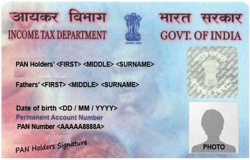

In [152]:
original

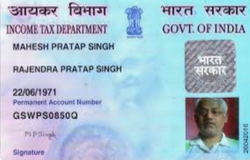

In [153]:
tampered

In [154]:
original = cv2.imread("pan_tampered/image/original.png")
tampered = cv2.imread("pan_tampered/image/tampered.png")

In [155]:
# convert to greyscale images , many application does not help us identifying the important edges of colored image. greyscale has 1 channel colored has 3\
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [156]:
original_gray

array([[254, 254, 253, ..., 253, 252, 254],
       [254, 251, 249, ..., 249, 249, 252],
       [253, 249, 252, ..., 249, 248, 251],
       ...,
       [249, 229, 217, ..., 190, 200, 238],
       [251, 249, 246, ..., 238, 241, 247],
       [253, 254, 253, ..., 255, 254, 253]], dtype=uint8)

In [157]:
tampered_gray

array([[238, 235, 242, ..., 209, 201, 208],
       [236, 236, 241, ..., 213, 206, 205],
       [233, 237, 241, ..., 208, 206, 201],
       ...,
       [235, 223, 222, ..., 196, 196, 196],
       [242, 232, 219, ..., 197, 198, 200],
       [244, 240, 226, ..., 194, 196, 199]], dtype=uint8)

In [158]:
# compute the structural similarity Inxed bw the two image , ensuring that the duifference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full = True)
diff = (diff * 255).astype("uint8")
print ( "  SSIM : {}".format(score) )

  SSIM : 0.21061964044680836


SSIM value = 1 oe very close to 1 means the pan card is valid and has not been tampered. But we will find threshold and contours of the image to further verify it 


In [159]:
# calculate thereshold and contours
threshold = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(threshold.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

Here we are using a threshold function of Computer vision library which applies an adaptive threshold to an image which is stored in the form of array ( similar to the one presented above) . This function converts greyscale image into binary image using a mathematical formula. 
The findcontours function works on binary images and retrieve the contours . These contours are useful tools for shaping analysis and recognition. Grab contours grabs the appropriate value of the contours .....

In [160]:
for c in contours:
  # applying contours on Image 
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x, y), (x + w, y + h), (0,0,255), 2)
  cv2.rectangle(tampered, (x, y), (x + w, y + h), (0,0,255), 2)

original format Image


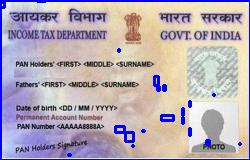

In [161]:
print("original format Image")
Image.fromarray(original)

tampered check format Image


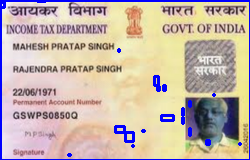

In [162]:
print("tampered check format Image")
Image.fromarray(tampered)

contours aren't helping in deciding the difference as there aren't many differences to figure out in contours 

 Difference Image:


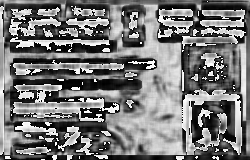

In [163]:
print(" Difference Image:")
Image.fromarray(diff)

it, for sure looks very ugly, but its like there are a lot many differences which is why it looks so.

Threshold Image


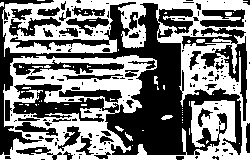

In [164]:
print("Threshold Image")
Image.fromarray(threshold)

Finding out the structural similarity of the images, helped us in finding the shape and similarity of the images. finding the threshold and contours based on the threshold for the image converted into grayscale binary we can also get a better idea of shape and analysis
our SSIM = 21.06 % which is low. more like saying the image user provided is not matching or is not a valid one for certain similarity criteria .
 finally we visualized the difference and similarities between the images by displaying the images with contours, differences and threshold.
 can be used for any kind of id verification like aadhar , voter id and other such id verification which inolves a similarity in the structure of the ID card or document